<a href="https://colab.research.google.com/github/tevfikaytekin/data_science/blob/master/regression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)




2.3.0


In [17]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

ModuleNotFoundError: ignored

In [ ]:
train = pd.read_csv("train.csv")

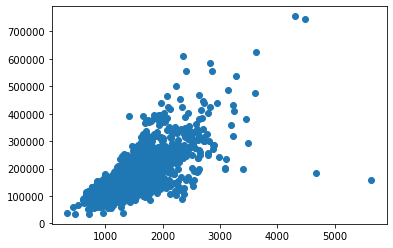

In [2]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

In [6]:
# Run regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    #layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [30]:
example_batch = X[:10]
example_result = model.predict(example_batch)
example_result

array([[-126.89461 ],
       [  12.080307],
       [-115.91498 ],
       [ -83.671005],
       [ -92.35979 ],
       [-111.70584 ],
       [  59.009644],
       [-107.309784],
       [ -89.75102 ],
       [ -28.345352]], dtype=float32)

In [31]:
EPOCHS = 100

history = model.fit(
  X, y,
  epochs=EPOCHS, validation_split = 0.2)
  #callbacks=[tfdocs.modeling.EpochDots()])

Epoch 1/100
37/37 [==============================] - 0s 5ms/step - loss: 38352908288.0000 - mae: 179374.6094 - mse: 38352908288.0000 - val_loss: 38987096064.0000 - val_mae: 179802.9531 - val_mse: 38987096064.0000
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 37486288896.0000 - mae: 177020.6094 - mse: 37486288896.0000 - val_loss: 38036627456.0000 - val_mae: 177257.1719 - val_mse: 38036627456.0000
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 36428050432.0000 - mae: 174155.4844 - mse: 36428050432.0000 - val_loss: 36805382144.0000 - val_mae: 173918.2812 - val_mse: 36805382144.0000
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 35118067712.0000 - mae: 170532.0938 - mse: 35118067712.0000 - val_loss: 35334332416.0000 - val_mae: 169860.7969 - val_mse: 35334332416.0000
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 33571528704.0000 - mae: 166180.6094 - mse: 33571528704.0000 - val_loss: 336

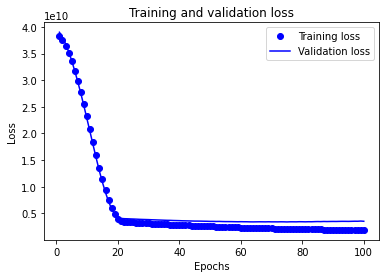

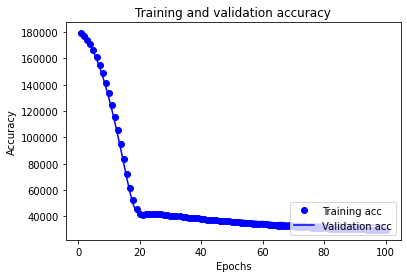

In [32]:
history_dict = history.history

acc = history_dict['mae']
val_acc = history_dict['val_mae']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
#plt.ylim((0.5,1))
plt.show()

In [23]:
history_dict.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])